# Reading an ASCII Catalog file

In order to do inline plotting within a notebook, ipython needs a magic command, commands that start with the %

In [ ]:
%matplotlib inline

Importing some modules (libraries) and giving them short names such as **np** and **plt**. You will find that most users will use these common ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Simple example of opening a file, read lines using columns to separate each cell, then any cell can be put into a variable

This assumes that each line is a separate source and the entries on the line are space separated. In this case, we are reading one line at a time and printing out information on that line. The data for a line are not saved anywhere for later access. At the end "line" and "name" contain only the last values read.

In [2]:
fdata = open('junk.txt', 'r')
for line in fdata:
    print(repr(line))
    line = line.strip()
    columns = line.split()
    name = columns[0]
    print("NAME = ",name)

'     4273718580960061184     277.484124608      0.762186       1.172287709   18h29m56.19s   01d10m20.24s      0.895364          null            null              null              null              null              null      0.657550              null          null           null               null           null            null                null                 null             null                  0      2230.323451802            23.338522621      17.153850436       NOT_AVAILABLE    31.521989935     5.318127411   278.221156656    24.398236245      285.539590   191.543420 \n'
NAME =  4273718580960061184
'     4273718580960238464     277.480437183      4.803475       1.179580819   18h29m55.30s   01d10m46.49s      5.569466          null            null              null              null              null              null      0.697250              null          null           null               null           null            null                null                 null          

## Now lets use astropy table reader... because it is easier..

A file with the extension .tbl is an ipac table type. astropy knows this format, as well as many other formats. It reads the file into a structure "t". Nice work astropy people!

In [3]:
from astropy.table import Table
t = Table.read('junk.tbl', format='ascii.ipac')

print(t)



     source_id            ra      ra_error ...    dist      angle   
                         deg        mas    ...   arcsec      deg    
------------------- ------------- -------- ... ---------- ----------
4273718580960061184 277.484124608 0.762186 ...  285.53959  191.54342
4273718580960238464 277.480437183 4.803475 ... 263.105399 195.522459
4273718649681459456 277.471101787 1.943808 ... 271.186536 202.553275
4273718821478507520 277.543899993 0.166647 ... 292.934653 147.357786
4273718821480164864 277.538496048 4.346684 ... 261.950567 148.066172
4273718924559608320 277.545965065 2.116391 ... 236.593608  135.63324
4273718958917194112 277.484107167 0.379391 ... 249.334055 193.262881
4273718958917361152 277.496387404 2.812314 ... 220.380289 183.382445
4273718958917457536 277.490223687 0.255402 ... 249.083106 188.121176
4273718958917457664 277.489880416 0.261258 ... 255.734238 188.188159
4273719027636934144 277.475336494 0.294945 ... 208.290825 205.225332
4273719096360269952 277.516409123 

## Access to values within the table...

Astropy reads both the header information and the ascii column information. The data in the columns of the table go into the structure with labels corresponding to the column header title... for example

In [4]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['source_id', 'ra', 'ra_error', 'dec', 'clon', 'clat', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_variable_flag', 'l', 'b', 'ecl_lon', 'ecl_lat', 'dist', 'angle']


## so you can access, for example, the parallax, or phot_g_mean_mag

In [5]:
print(t["source_id","parallax","phot_g_mean_mag"])

     source_id      parallax phot_g_mean_mag
                      mas          mag      
------------------- -------- ---------------
4273718580960061184       --    17.153850436
4273718580960238464       --    20.427115219
4273718649681459456       --    19.968418586
4273718821478507520       --     12.92667538
4273718821480164864       --    20.351699302
4273718924559608320       --     19.92061645
4273718958917194112       --    15.312376818
4273718958917361152       --    19.275004957
4273718958917457536 3.775995     8.460609607
4273718958917457664 3.820444     9.680816102
4273719027636934144       --    13.281755305
4273719096360269952       --    20.100742229
4273719199435379200       --    18.188039379
4273719405593791744       --    15.207808536
4273719409887143424       --    16.374846256
4273719684765064832       --    16.978314598
4273719955349625984       --    19.626071338
4273720024069117312       --     15.68405274
4273720230227656960       --    15.939701416
4273720230

## So now lets load in a larger table so we can make some interesting plots

This is a GAIA table for a 5 arcmin radius region around RA=18:30 Dec=1:15. It has 84 entries.

phot_g_mean_mag
      mag      
---------------
   17.153850436
   20.427115219
   19.968418586
    12.92667538
   20.351699302
    19.92061645
   15.312376818
   19.275004957
    8.460609607
    9.680816102
            ...
   16.268683339
   19.569729179
   18.756960034
   19.308948238
   19.889002989
   19.215559453
   18.468328492
   19.248323758
   20.272776217
   18.429863168
Length = 84 rows


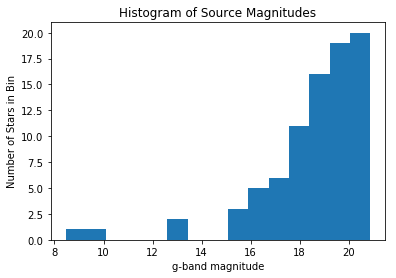

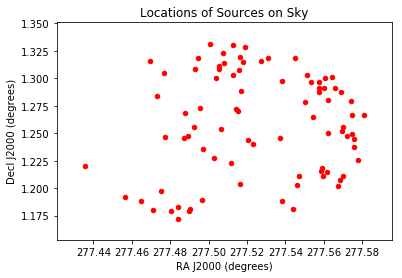

In [6]:
tfull = Table.read('junk-full.tbl', format='ascii.ipac')
mags = tfull["phot_g_mean_mag"]

print(mags)
bins = 15
plt.xlabel('g-band magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Magnitudes')
plmags=plt.hist(mags,bins)
plt.show()

xpos = tfull["ra"]
ypos = tfull["dec"]
plt.xlabel('RA J2000 (degrees)')
plt.ylabel('Decl J2000 (degrees)')
plt.title('Locations of Sources on Sky')
plt.scatter(xpos,ypos,s=20.0,c='r')
plt.show()